## 1. Introduction
Optimization is the process of picking the best elements from a set of potential candidates to reach a specific goal.
We perform a lot of optimization tasks in our everyday life: finding the shortest or fastest route to reach a destination, preparing a to-do list with daily assignments ordered by priority, buying groceries.
We can describe such problems starting with the definition of an objective function $f(x)$.

Let us imagine that we are organizing a journey to another city, and we are trying assess a suitable departure time. 
In this example, the objective function $f(x)$ is the duration of the trip as function of the departure time $x$.

We can formulate an optimization problem as the identification of the minimum or maximum value of the objective function. 
In our example, we want to determine the departure time that will minimize the duration of the trip:

\begin{equation}
\min_{x} f(x)
\end{equation}

In other scenarios, we may want to maximize $f(x)$. For instance, when the objective represents a likelihood or a return of investment. Nevertheless, maximizing a function is equivalent to minimizing its negative. 
Therefore, one may focus on minimization problems alone:

\begin{equation}
\max_{x} = \min_{x} -f(x)
\end{equation}

In real-world applications, we may need to apply constraints to our optimization problem. For example, we may want to find the fastest route, but we are unwilling to pay tolls, or travel at night. We define constrained optimization as the process of minimizing the objective function under some logical conditions that may reflect:

    * real-world limitations;
    * the physical meaning of the input variables;
    * contextual circumstances.
    
In this post, we share an optimization example using SciPy, a popular Python library for scientific computing. In particular, we explore the most common constraint types: bounds, linear and nonlinear constraints.

## 2. Implementation
### 2.1 Unconstrained optimization
We start from a simple unconstrained optimization problem, and add constraints to the input variables later on.

Import the needed libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

Imagine the following multivariable objective function:

\begin{equation}
f(x_0, x_1) = 0.5 \cdot x_0^2 + 2.5 \cdot x_1^2 + 4 \cdot x_0 \cdot \sin{(\pi \cdot x_0)} + 5
\end{equation}

Its gradient with respect to $x_0$ and $x_1$ is

\begin{equation}
\nabla f(x_0, x_1) = \left\{
\begin{aligned}
\frac{\partial f(x_0, x_1)}{\partial x_0} &= x_0 + 4 \cdot \sin{(\pi \cdot x_0)} + 4 \cdot x_0 \cdot \cos{(\pi \cdot x_0)},\\
\frac{\partial f(x_0, x_1)}{\partial x_1} &= 5 \cdot x_1.
\end{aligned}
\right.
\end{equation} 

In [2]:
def f(x):
    '''Objective function'''
    return 0.5*x[0]**2 + 2.5*x[1]**2 + 4 * x[0] * np.sin(np.pi * x[0]) + 5

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] + 4 * np.sin(np.pi * x[0]) + 4 * np.pi * x[0] * np.cos(np.pi * x[0]), 5*x[1]])

Let us generate data and observe the function values for $x_0$, $x_1$ ∈ [-1, 1]:

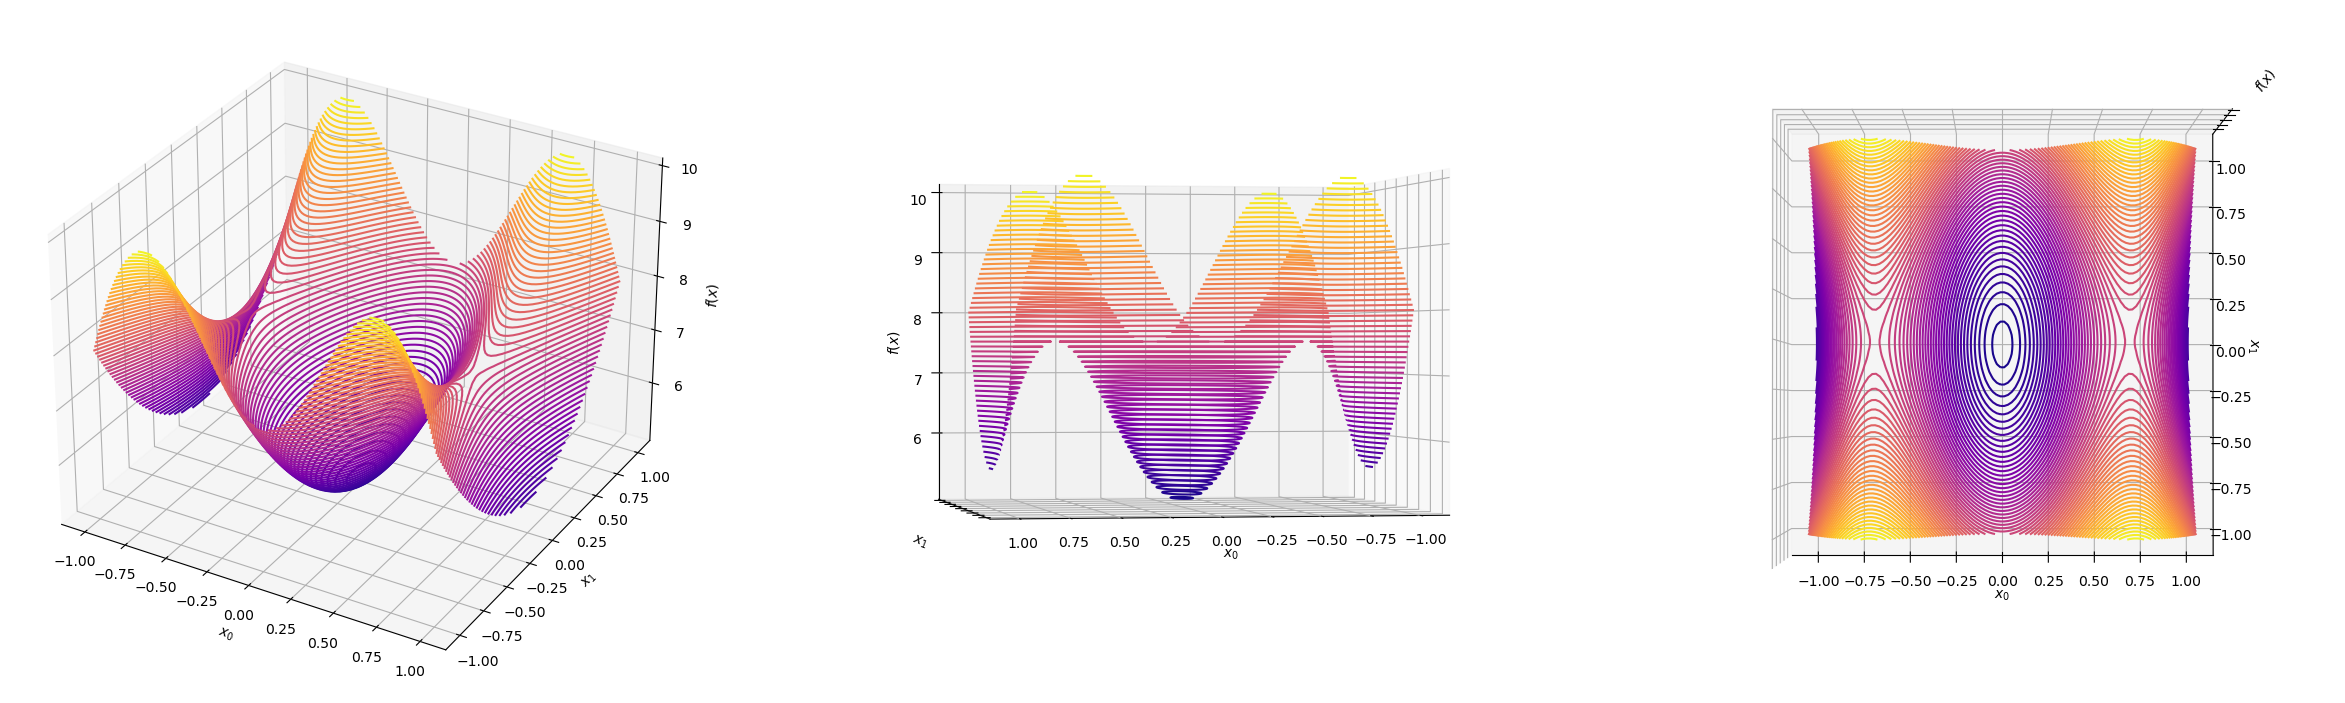

In [3]:
# Generate data
X0, X1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = f(np.stack([X0, X1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

The objective function is non-convex and possesses several minima.

This implies that, depending on the starting point, the problem may converge to a different minimizer.

We can solve the optimization problem by leveraging the helpful scipy.optimize.minimize function as follows:

In [4]:
# Starting point
x_start = np.array([0.5, 0.5])

# Optimization
result = minimize(
    f, x_start, method='trust-constr', jac=df)

result.x.round(3)

array([-0.,  0.])

Notably, we are applying the trust-constr method. It allows to optimize a function subject to constraints. More information on the method is available in the package documentation and in "Trust-region methods" (Conn, Gould and Toint; 2000).

The above code snippet returns the found minimizer:

In [ ]:
array([-0.,  0.])

Let us plot it:

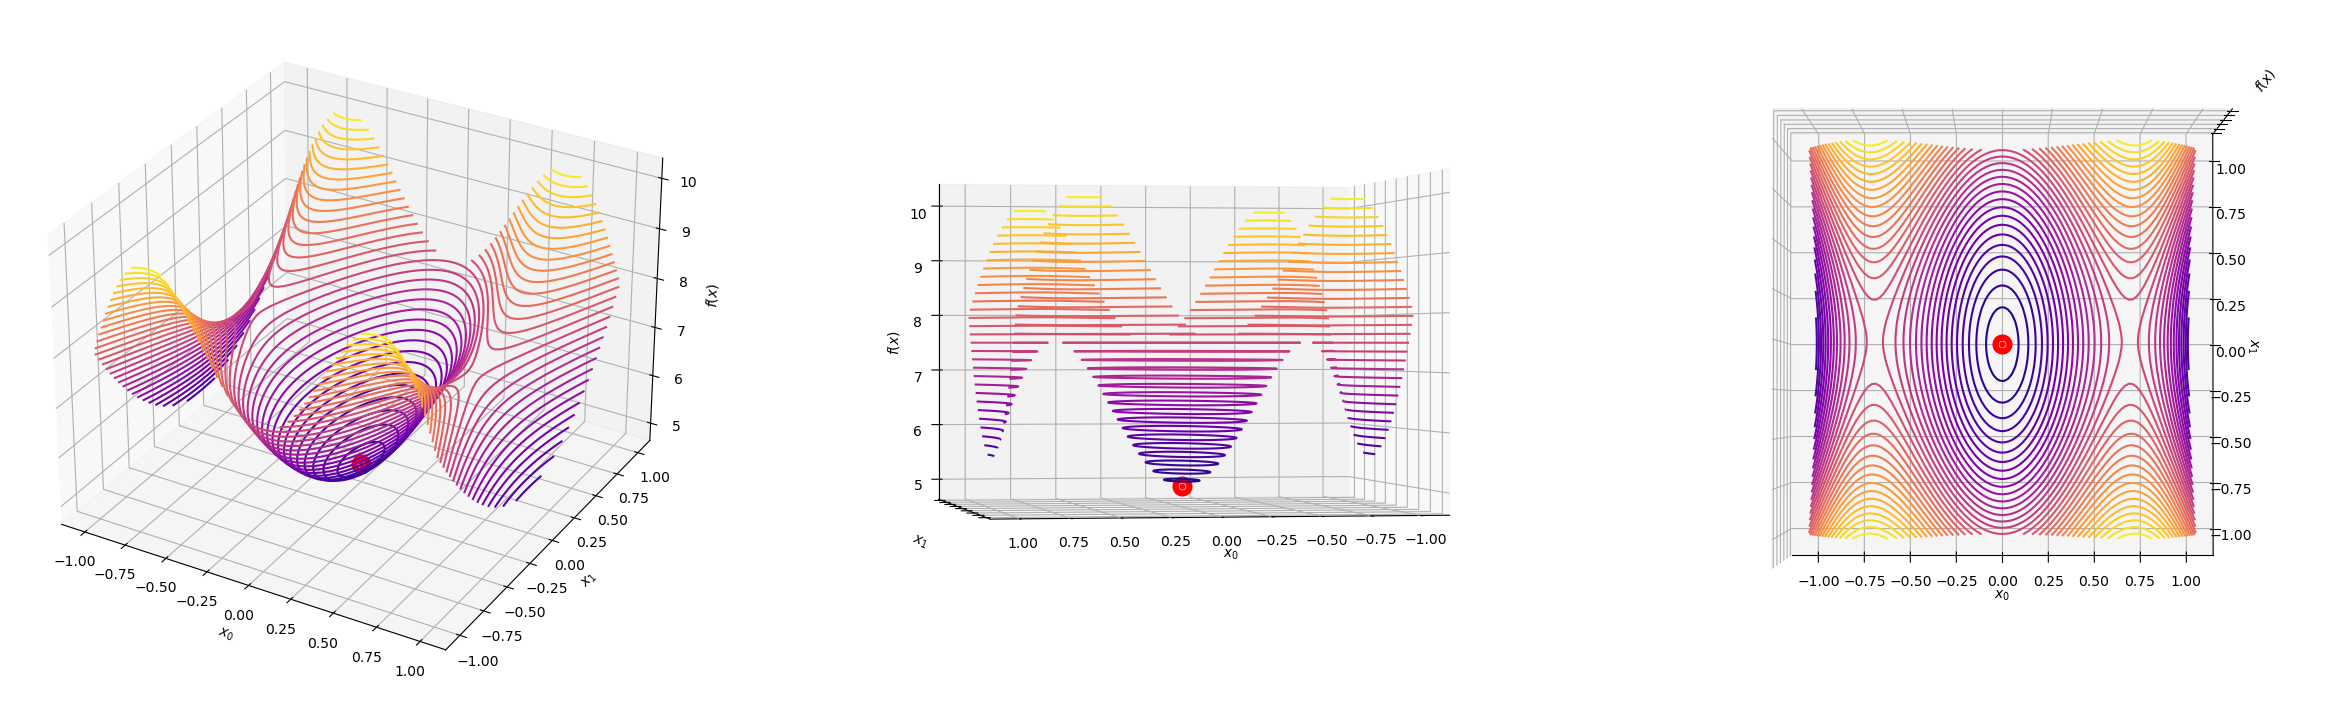

In [6]:
# Minimum from unconstrained optimization
min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])   
min_z = f(np.stack([min_x0, min_x1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

Objective function and its minimizer. Image by author.
We can now experiment the addition of constraints.

### 2.2 Bounds
Let us consider our previous example about finding the fastest trip between two cities, with the departure time as input variable. We may expect to find more or less traffic depending on the hour of the day. By aiming at minimizing the duration of the trip, a model may also suggest, for instance, to travel at night.

Although this might result in the shortest trip, we may prefer to travel during daytime. So, we could ask the model to find the shortest trip considering departure times ranging from 7.00 AM to 6.00 PM only.

This is where bounds come in. Bounds are simply equality or inequality constraints on input variables. They allow to evaluate the objective function solely between the specified ranges.

In our case, suppose to have the following acceptable values for $x_0$ and $x_1$:

\begin{equation}
\left\{
\begin{aligned}
0.25 \leq x_0 \leq 0.75,\\
0.30 \leq x_1 \leq 0.8.
\end{aligned}
\right.
\end{equation} 

We can easily pass these values to the Bounds object and perform a new optimization experiment as follows:

In [7]:
lim = [0.25, 0.30, 0.75, 0.8]

bounds = Bounds([lim[0], lim[1]],  # [min x0, min x1]
                [lim[2], lim[3]])  # [max x0, max x1]

result = minimize(
    f, x_start, method='trust-constr', jac=df, bounds=bounds)

result.x.round(3)

array([0.25 , 0.301])

The optimization task leads now to a different solution, as the previous point array([0 , 0]) does not fall in the feasible region:

array([0.25, 0.301])
We can finally plot the new minimum and the feasible region, and observe the area in which f(x) was evaluated:

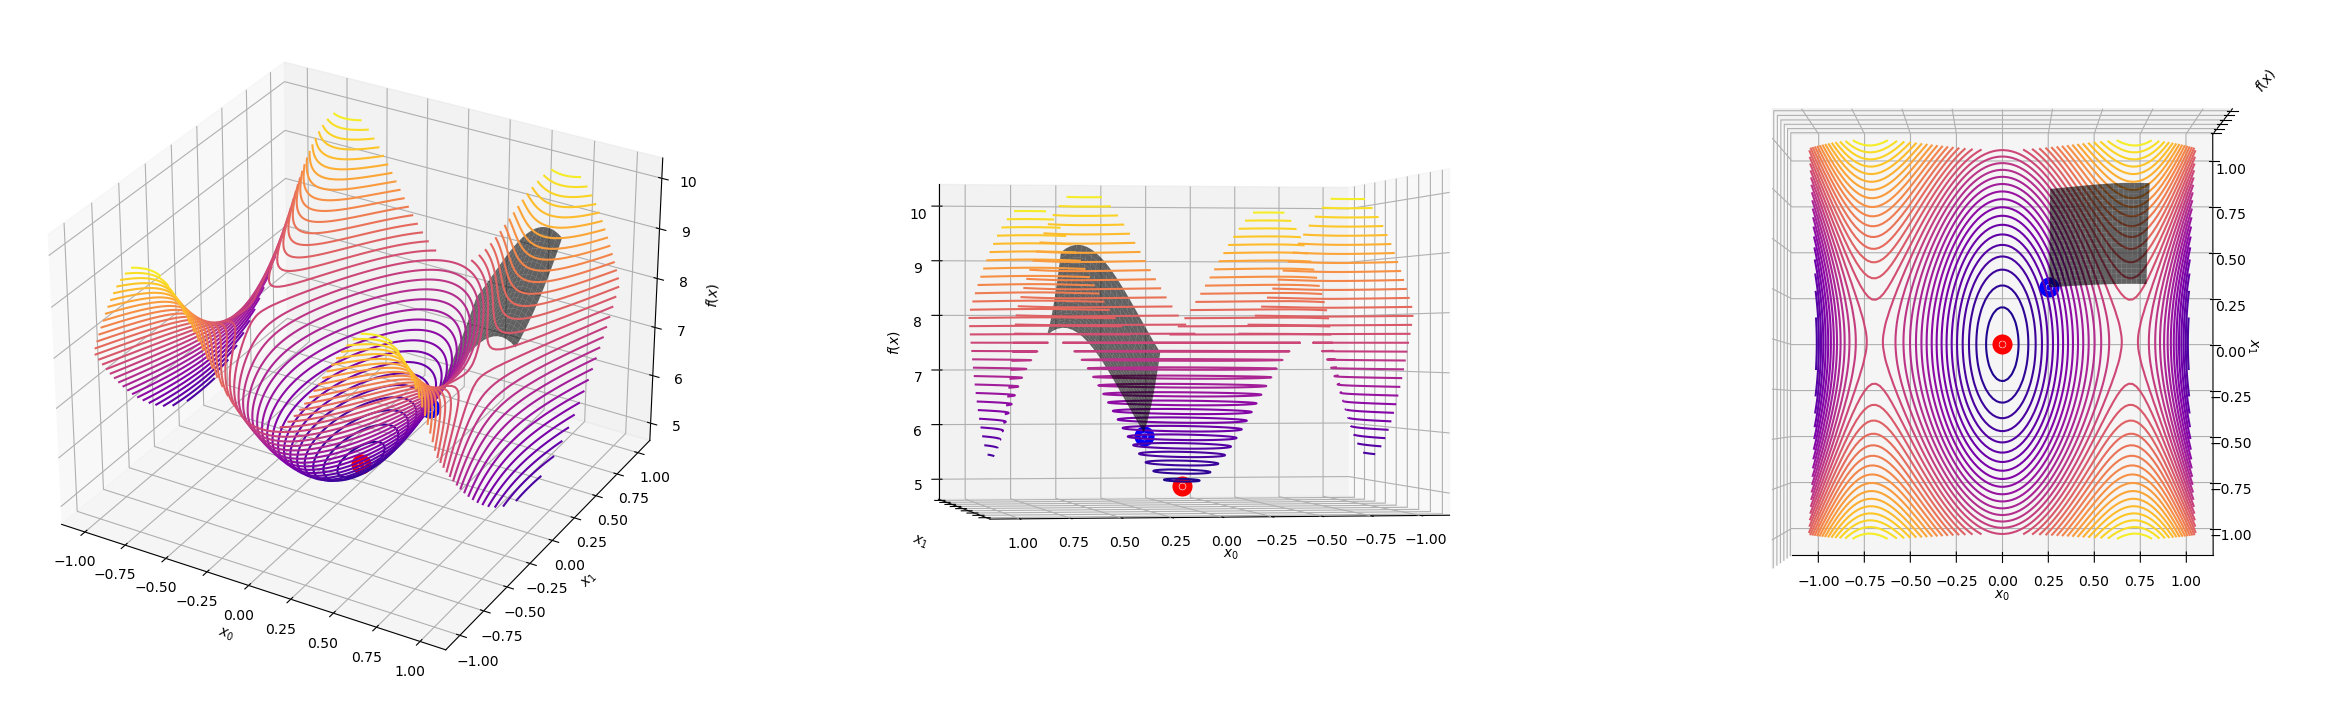

In [8]:
# Feasible region (bounds)
X0_bound, X1_bound = np.meshgrid(np.linspace(lim[0], lim[2], 20), np.linspace(lim[1], lim[3], 20))
Z_bound = f(np.stack([X0_bound, X1_bound]))

# New minimum within bounds
min_x0_bounds, min_x1_bounds = np.meshgrid(result.x[0], result.x[1])   
min_z_bounds = f(np.stack([min_x0_bounds, min_x0_bounds]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

Objective function with “unconstrained” minimum (red dot) and minimum resulting from the application of bounds (blue dot). The applied variables ranges identify the grey colored area (feasible region).

In [ ]:
### 2.3 Linear constraints
Linear constraints define linear relations between the optimization variables.
For example, let us imagine x₀ and x₁ to be subject to

\begin{equation}
\left\{
\begin{aligned}
x_0 \geq 0.25,\\
x_0 - x_1 \leq 0.1.
\end{aligned}
\right.
\end{equation} 

We can easily rewrite these conditions as a linear system, and pass them to the LinearConstraint object before running the optimization task:

In [14]:
linear_constraint = LinearConstraint(
    [[1, 0], [1, -1]], [0.25, -np.inf], [np.inf, 0.1])

result = minimize(
    f, x_start, method='trust-constr', jac=df, constraints=linear_constraint)

result.x.round(3)

array([0.25, 0.15])

The new solution is

In [ ]:
array([0.25, 0.15])

The feasible region of f(x) corresponds to a portion of the space delimited by an intersection of hyperplanes. Let us plot these boundaries:

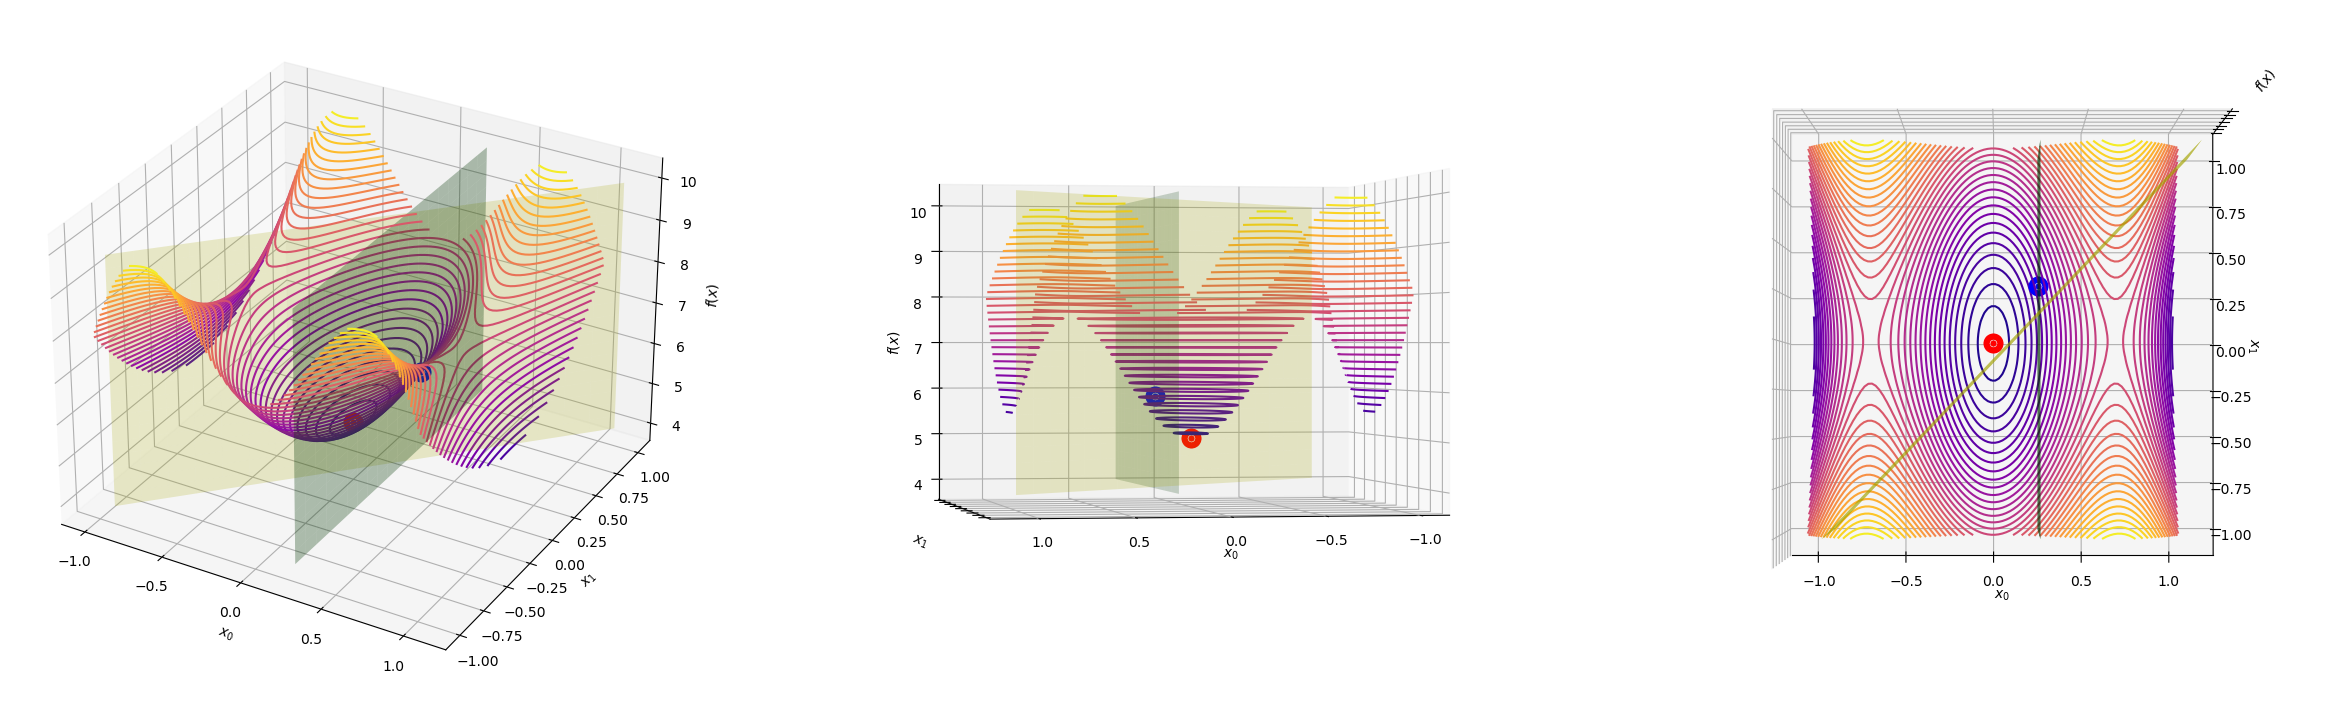

In [9]:
# Linear constraints: first hyperplane
X0_lin_1 = np.repeat(0.25, 20)
X1_lin_1, Z_lin_1 = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(4, 10, 20))

# Linear constraints: second hyperplane
X1_lin_2 = np.linspace(-1, 1, 20)
X0_lin_2 = X1_lin_2 + 0.1

# New minimum with linear constraints
min_x0_lin_constr, min_x1_lin_constr = np.meshgrid(result.x[0], result.x[1])   
min_z_lin_constr = f(np.stack([min_x0_lin_constr, min_x0_lin_constr]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=0.3)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=0.2)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=0.2)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=0.2)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=1)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=1)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

Objective function. The blue dot is the minimum identified by applying linear constraints, whose boundaries are shown as hyperplanes. Image by author.

### 2.4 Nonlinear constraints
We can also explore the objective function within the region defined by nonlinear constraints using the NonlinearConstraint object. Assume that x₀ and x₁ are subject to:

\begin{equation}
x_0^2 + x_1^2 \geq 0.2
\end{equation}

We optimize $f(x)$ as follows:

In [12]:
non_linear_eq= lambda x: x[0]**2 + x[1]**2

non_linear_constr = NonlinearConstraint(
    non_linear_eq, 0.2, np.inf)

result = minimize(
    f, np.array([0.5, 1]), method='trust-constr', jac=df, constraints=non_linear_constr)

result.x.round(3)

array([-0.   ,  0.447])

Similarly to the previous examples, we could observe the objective and the found minimizer given the current constraint:


The feasible region is outside of the cylinder defined by the nonlinear constraint. Image by author.

### 2.5 Applying different constraint types together
We can combine bounds as well as linear and nonlinear constraints as follows:

In [15]:
result = minimize(
    f, 
    x_start, 
    method='trust-constr', 
    jac=df, 
    bounds=bounds,
    constraints=[linear_constraint, non_linear_constr]
)

result.x.round(3)

array([0.25 , 0.371])

We remark that not all optimization methods support bounds and/or constraints. Additional information can be found in the package documentation.

### 3. Conclusions
In this post, we explored different types of optimization constraints. In particular, we shared practical Python examples using the SciPy library. The examples come with plots that allow to visually inspect the different constraints.

https://towardsdatascience.com/introduction-to-optimization-constraints-with-scipy-7abd44f6de25

### 4 Complete SHAP tutorial for model explanation Part 5. Python Example
https://summer-hu-92978.medium.com/complete-shap-tutorial-for-model-explanation-part-5-python-example-4dfb2d688557

### 5. 自動化調整超參數方法介紹
https://medium.com/jackys-blog/%E8%87%AA%E5%8B%95%E5%8C%96%E8%AA%BF%E6%95%B4%E8%B6%85%E5%8F%83%E6%95%B8%E6%96%B9%E6%B3%95%E4%BB%8B%E7%B4%B9-%E4%BD%BF%E7%94%A8python-40edb9f0b462
### 5.1 Bayesian Sorcery for Hyperparameter Optimization using Optuna
https://medium.com/@becaye-balde/bayesian-sorcery-for-hyperparameter-optimization-using-optuna-1ee4517e89a

### 貝葉斯調參（Bayesian Optimization）是一種基於貝葉斯統計理論的自適應超參數最佳化方法，
- 它能夠在相對較少的試驗次數內，快速有效地搜尋到最優的超參數組合。
- 此方法基於貝葉斯公式（Bayes' formula），根據先驗分佈和樣本數據，求後驗分佈，從而得到最優的超參數組合。具體來說，此方法將超參數作為待優化的變量，將評估指標作為目標函數，透過不斷調整超參數的取值，並利用貝葉斯公式推導出後驗分佈，確定下一個可能的最優解，進而引導下一步實驗的設計，最終實現超參數的自適應最佳化。
- 貝葉斯調參的主要優點包括：
    -（1）相對於傳統的網格搜尋或隨機搜尋等暴力調參方法，其收斂速度更快，需要嘗試的超參數組合更少；
    -（2）它透過基於模型的高斯過程（Gaussian Process）模型來建模和預測目標函數，不需要對目標函數進行連續可導或凸最佳化等限制，適用於各種類型的目標函數；
    -（3）它可以進行並行化，加速搜尋過程。
- 需要注意的是，貝葉斯調參也存在一些限制和缺點，
    - 例如需要對參數的先驗分佈進行設定，選取合適的先驗分佈是至關重要的；
    - 並且在求解高維問題時，貝葉斯調參的計算複雜度也可能會變得很高。

綜上所述，貝葉斯調參是一種基於貝葉斯統計理論的自適應超參數最佳化方法，它具有收斂速度快、不需要連續可導或凸優化等限制、可以進行並行化等優點，適用於各種類型的目標函數。